In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
# Load the dataset
df = pd.read_csv('Toddler Autism dataset July 2018.csv')  # Replace with the correct path to your CSV file


In [4]:
df.head()

Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1               Yes  
2               Yes  
3               Yes  
4               Yes

In [5]:
# 2. Handle missing values in 'age' column by filling with mean
df['Age_Mons'] = df['Age_Mons'].fillna(df['Age_Mons'].mean())

In [6]:
# 3. Apply Label Encoding to categorical columns
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])


In [7]:
# 4. Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [8]:
df.head()


Case_No   A1   A2   A3   A4   A5   A6   A7   A8   A9  A10  Age_Mons  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.666667   
1  0.000950  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.000000   
2  0.001899  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.000000   
3  0.002849  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.500000   
4  0.003799  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.333333   

   Qchat-10-Score  Sex  Ethnicity  Jaundice  Family_mem_with_ASD  \
0             0.3  0.0        0.8       1.0                  0.0   
1             0.4  1.0        0.5       1.0                  0.0   
2             0.4  1.0        0.8       1.0                  0.0   
3             1.0  1.0        0.0       0.0                  0.0   
4             0.9  0.0        0.5       0.0                  1.0   

   Who completed the test  Class/ASD Traits   
0                     1.0                0.0  
1                     1.0                1.0  
2                     1.0                1.0  
3                     1.0                1.0  
4                     1.0                1.0

In [9]:
df.tail()

Case_No   A1   A2   A3   A4   A5   A6   A7   A8   A9  A10  Age_Mons  \
1049  0.996201  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.500000   
1050  0.997151  0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.000000   
1051  0.998101  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.250000   
1052  0.999050  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.291667   
1053  1.000000  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  0.500000   

      Qchat-10-Score  Sex  Ethnicity  Jaundice  Family_mem_with_ASD  \
1049             0.1  0.0        0.5       0.0                  1.0   
1050             0.5  1.0        0.7       1.0                  0.0   
1051             0.9  1.0        0.8       1.0                  0.0   
1052             0.3  1.0        0.5       0.0                  1.0   
1053             0.6  1.0        0.6       1.0                  1.0   

      Who completed the test  Class/ASD Traits   
1049                     1.0                0.0  
1050                     1.0                1.0  
1051                     1.0                1.0  
1052                     1.0                0.0  
1053                     1.0                1.0

In [10]:
# Check the exact column names in the DataFrame
print(df.columns)



Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


In [11]:
# Change the column name from 'OldName' to 'NewName'
df = df.rename(columns={'Class/ASD Traits ': 'asd_traits'})


In [12]:
df.head()

Case_No   A1   A2   A3   A4   A5   A6   A7   A8   A9  A10  Age_Mons  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.666667   
1  0.000950  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.000000   
2  0.001899  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.000000   
3  0.002849  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.500000   
4  0.003799  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.333333   

   Qchat-10-Score  Sex  Ethnicity  Jaundice  Family_mem_with_ASD  \
0             0.3  0.0        0.8       1.0                  0.0   
1             0.4  1.0        0.5       1.0                  0.0   
2             0.4  1.0        0.8       1.0                  0.0   
3             1.0  1.0        0.0       0.0                  0.0   
4             0.9  0.0        0.5       0.0                  1.0   

   Who completed the test  asd_traits  
0                     1.0         0.0  
1                     1.0         1.0  
2                     1.0         1.0  
3                     1.0         1.0  
4                     1.0         1.0

In [13]:
X = df.drop('asd_traits', axis=1)  # Check for trailing spaces
y = df['asd_traits']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

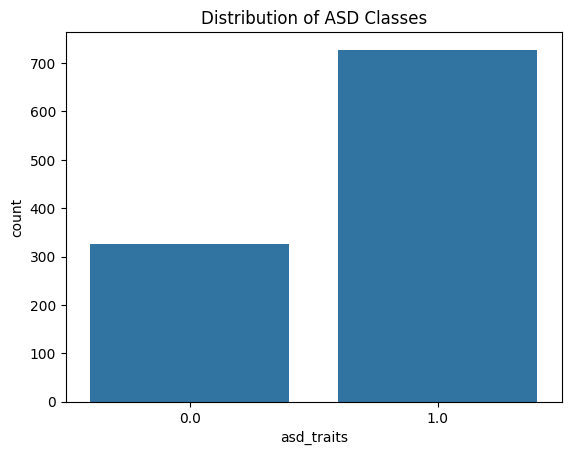

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of target variable
sns.countplot(x='asd_traits', data=df)
plt.title('Distribution of ASD Classes')
plt.show()


In [16]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Step 2: Fit the model to the training data
log_reg.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Step 4: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 1.00
Confusion Matrix:
[[ 69   0]
 [  0 142]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        69
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [17]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


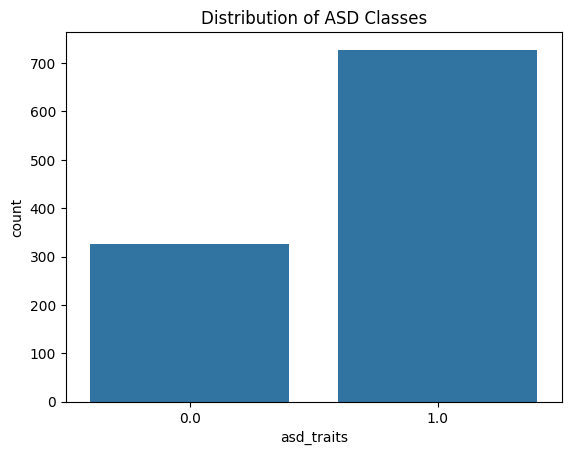

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of target variable
sns.countplot(x='asd_traits', data=df)
plt.title('Distribution of ASD Classes')
plt.show()

In [22]:
# Step 2: Apply SMOTE to the training data only

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


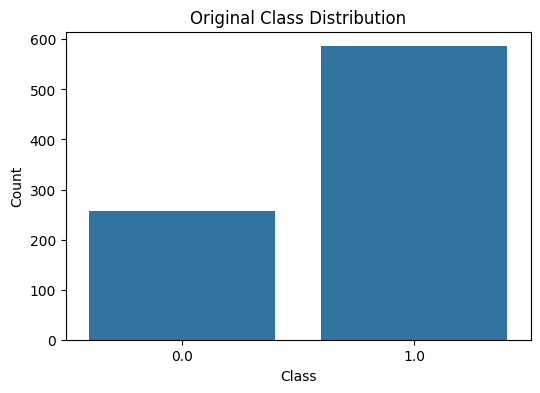

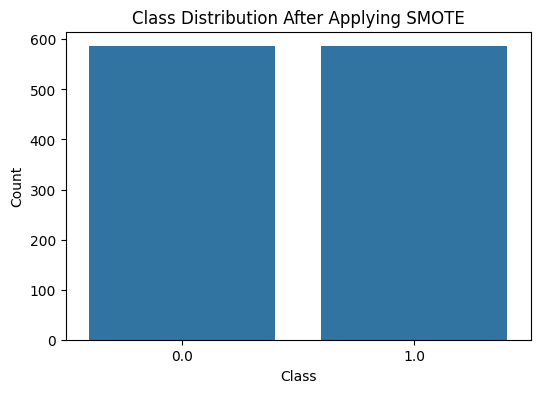

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the original class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualize the resampled class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_res)
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [24]:
# Step 3: Train the model (Logistic Regression in this case) on the resampled data
model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)


LogisticRegression(random_state=42)

In [25]:
# Step 4: Predict on the test set
y_pred = model.predict(X_test)


In [26]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 1.00
Confusion Matrix:
[[ 69   0]
 [  0 142]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        69
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [28]:
#our model with logistic regression is overfitting 

Using Recursive Feature Elimination (RFE) as well as setting regularization params to prevent overfitting.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Step 1: Initializing the Logistic Regression model with regularization (C=0.01) -- keeping the model simpler 
model = LogisticRegression(C=0.01, random_state=42)

# Step 2: Select the top 10 most important features using RFE
selector = RFE(model, n_features_to_select=10)

# Apply RFE on the resampled training data
X_train_res_selected = selector.fit_transform(X_train_res, y_train_res)

# Apply RFE on the test data as well
X_test_selected = selector.transform(X_test)

# Step 3: Train the Logistic Regression model with the selected features
model.fit(X_train_res_selected, y_train_res)

# Step 4: Predict on the test data (with the selected features)
y_pred = model.predict(X_test_selected)

# Step 5: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy after feature selection and regularization: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy after feature selection and regularization: 0.94
Confusion Matrix:
[[ 69   0]
 [ 12 130]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        69
         1.0       1.00      0.92      0.96       142

    accuracy                           0.94       211
   macro avg       0.93      0.96      0.94       211
weighted avg       0.95      0.94      0.94       211



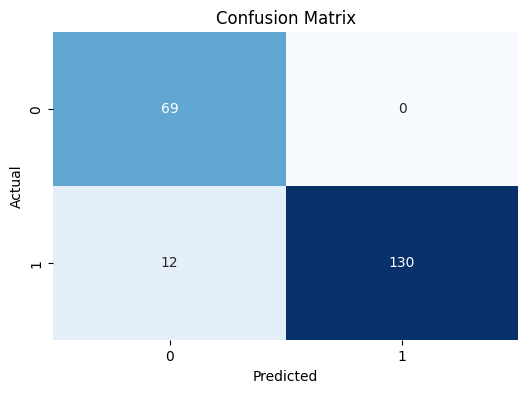

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


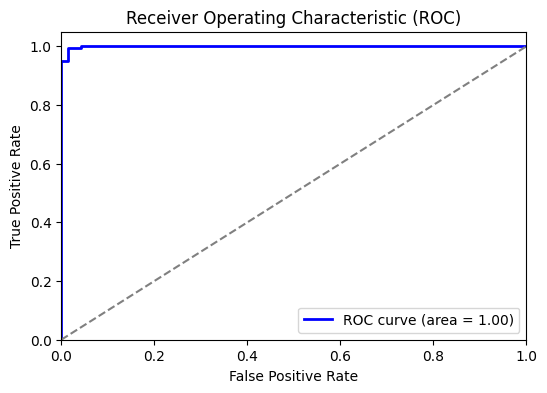

In [52]:
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the ROC curve
y_prob = model.predict_proba(X_test_selected)[:, 1]

# Compute the ROC curve and the AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


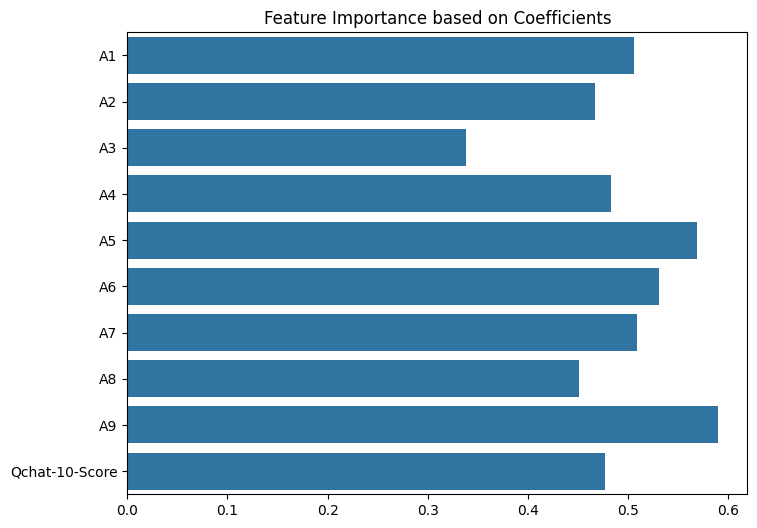

In [53]:
import numpy as np

# Get the selected feature names
selected_features = np.array(X_train_res.columns)[selector.support_]

# Get the coefficients of the logistic regression model
coefs = model.coef_[0]

# Plot the feature importance (absolute value of coefficients)
plt.figure(figsize=(8,6))
sns.barplot(x=coefs, y=selected_features)
plt.title('Feature Importance based on Coefficients')
plt.show()


Applying Cross validation 

Cross-Validation Scores: [0.93220339 0.96610169 0.98290598 0.94017094 0.96581197 0.97435897
 0.94017094 0.93162393 0.97435897 0.94017094]
Mean Cross-Validation Score: 0.95
Standard Deviation: 0.02


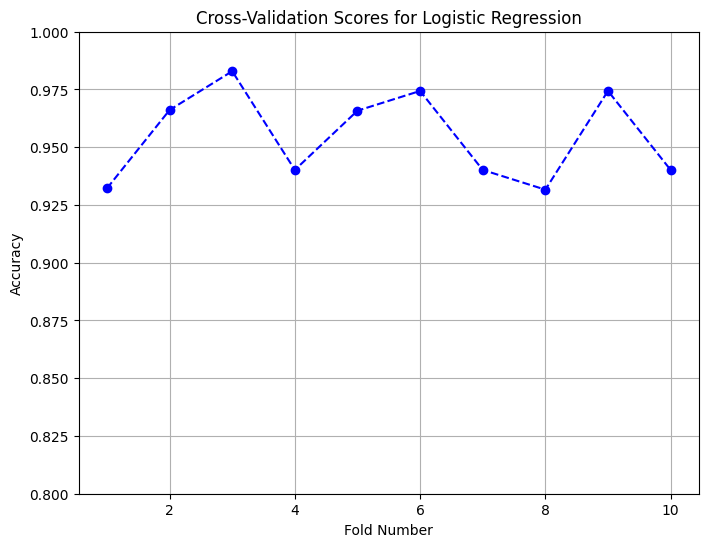

In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model with regularization (C=0.01)
model = LogisticRegression(C=0.01, random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X_train_res_selected, y_train_res, cv=10)

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation: {np.std(cv_scores):.2f}')

# Step 2: Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--', color='b')
plt.title('Cross-Validation Scores for Logistic Regression')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])  # Adjust based on expected range of accuracy scores
plt.grid(True)
plt.show()
